In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys
from tqdm import tqdm
import psix
from matplotlib.gridspec import GridSpec


cm = 1/2.54

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams['pdf.fonttype'] = 42

For guidance, Nature’s standard figure sizes are 89 mm (single column) and 183 mm (double column) and the full depth of the page is 247 mm.

In [3]:
meta = pd.read_csv('sim_output/meta.tab.gz', sep='\t')
meta.index=['cell_'+str(i+1) for i in range(1000)]

pop_1 = meta.loc[meta['pop'] == '3_1'].index
pop_2 = meta.loc[meta['pop'] == '3_2'].index
labels = [pop_1, pop_2]

In [7]:
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests


def run_kw(exon_psi, labels):
    kw_input = []
    for l in labels:
        kw_input.append(list(exon_psi[l]))
        
    if len(labels) == 2:
        return kruskal(kw_input[0], kw_input[1], nan_policy='omit')
    if len(labels) == 3:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], nan_policy='omit')
    if len(labels) == 4:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], nan_policy='omit')
    if len(labels) == 5:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], kw_input[4], nan_policy='omit')
    if len(labels) == 6:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], kw_input[4], kw_input[5], nan_policy='omit')
    if len(labels) == 7:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], kw_input[4], kw_input[5], kw_input[6], nan_policy='omit')
    if len(labels) == 8:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], kw_input[4], kw_input[5], kw_input[6], kw_input[7], nan_policy='omit')
    
def run_kw_dset(psi_table, labels, exon_list):
    kw_output = pd.DataFrame()
    kw_score = []
    pvals = []
    for exon in tqdm(exon_list, position=0, leave=True):
        score, p = run_kw(psi_table.loc[exon], labels)
        kw_score.append(score)
        pvals.append(p)
    kw_output['KW_score'] = kw_score
    kw_output['pvals'] = pvals
    kw_output['qvals'] = multipletests(pvals, method='fdr_bh')[1]
    kw_output.index = exon_list
    return kw_output



In [8]:
psix_single_lineage_1 = psix.Psix()
psix_single_lineage_1.junctions2psi(
        'processed_tables/splice_junction_counts_0.1.tab.gz',
        '',
        'processed_tables/tpm_0.1.tab.gz',
        save_files_in='psix_output/psix_object_0.1/')

psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=100)

psix_results_1 = psix_single_lineage_1.psix_results

kw_1 = run_kw_dset(psix_single_lineage_1.adata.uns['psi'][psix_results_1.index].T, 
                         labels, psix_results_1.index)

gearyc_1 = pd.read_csv('gearyc/gearyc_0.1.tab.gz', sep='\t', index_col=0)

100%|██████████| 3486/3486 [00:25<00:00, 136.25it/s]


In [9]:
psix_single_lineage_05 = psix.Psix()
psix_single_lineage_05.junctions2psi(
        'processed_tables/splice_junction_counts_0.05.tab.gz',
        '',
        'processed_tables/tpm_0.05.tab.gz',
        save_files_in='psix_output/psix_object_0.05/')


psix_single_lineage_05.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=100)

psix_results_05 = psix_single_lineage_05.psix_results

kw_05 = run_kw_dset(psix_single_lineage_05.adata.uns['psi'][psix_results_05.index].T, 
                         labels, psix_results_05.index)

gearyc_05 = pd.read_csv('gearyc/gearyc_0.05.tab.gz', sep='\t', index_col=0)

Obtaining PSI tables...
Reading TPM and transforming to mRNA counts...


100%|██████████| 1000/1000 [00:17<00:00, 57.93it/s]


Successfully processed RNA-seq data
Computing cell-cell metric...


100%|██████████| 1000/1000 [00:00<00:00, 7503.62it/s]

Successfully computed cell-cell metric
Computing Psix score in 3244 exons



100%|██████████| 3244/3244 [00:29<00:00, 109.01it/s] 


Successfully computed Psix score of exons.
Estimating p-values. This might take a while...


  0%|          | 9/3244 [00:00<00:36, 88.97it/s]

Successfully estimated p-values


100%|██████████| 3244/3244 [00:24<00:00, 135.01it/s]


In [10]:
psix_single_lineage_01 = psix.Psix()
psix_single_lineage_01.junctions2psi(
        'processed_tables/splice_junction_counts_0.01.tab.gz',
        '',
        'processed_tables/tpm_0.01.tab.gz',
        save_files_in='psix_output/psix_object_0.01/')


psix_single_lineage_01.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=100)

psix_results_01 = psix_single_lineage_01.psix_results

kw_01 = run_kw_dset(psix_single_lineage_01.adata.uns['psi'][psix_results_01.index].T, 
                         labels, psix_results_01.index)

gearyc_01 = pd.read_csv('gearyc/gearyc_0.01.tab.gz', sep='\t', index_col=0)

Obtaining PSI tables...
Reading TPM and transforming to mRNA counts...


100%|██████████| 1000/1000 [00:13<00:00, 73.82it/s]


Successfully processed RNA-seq data
Computing cell-cell metric...


100%|██████████| 1000/1000 [00:00<00:00, 8282.00it/s]

Successfully computed cell-cell metric
Computing Psix score in 2097 exons



100%|██████████| 2097/2097 [00:17<00:00, 118.69it/s] 


Successfully computed Psix score of exons.
Estimating p-values. This might take a while...


  1%|          | 18/2097 [00:00<00:11, 179.43it/s]

Successfully estimated p-values


100%|██████████| 2097/2097 [00:12<00:00, 161.41it/s]


In [19]:
from scipy.special import logit, expit
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc




platonic_psi = pd.read_csv('sim_output/psi_platonic.tab.gz', sep='\t', 
                               names = ['cell_'+str(i+1) for i in range(1000)])
platonic_psi.index = ['gene' + str(i+1) for i in range(5000)]

platonic_psi = expit(platonic_psi)


def get_random_samples(psix_results, kw, gearyc):
    
    pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results.index
    neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results.index

    psix_auc = []
    kw_auc = []
    gearyc_auc = []

    for i in tqdm(range(200)):

        pos_sample = np.random.choice(pos, int(len(pos)*0.2), replace=False)
        neg_sample = np.random.choice(neg, int(len(neg)*0.2), replace=False)

        labels = [1]*len(pos_sample) + [0]*len(neg_sample)
        order = list(pos_sample) + list(neg_sample)


        y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])


        pre, rec, thres = precision_recall_curve(y_, psix_results.loc[order].psix_score)
        pre_kw, rec_kw, thres_kw = precision_recall_curve(y_, kw.loc[order].KW_score)
        pre_c, rec_c, thres_c = precision_recall_curve(y_, gearyc.loc[order].C_score)

        psix_auc.append(auc(rec, pre))
        kw_auc.append(auc(rec_kw, pre_kw))
        gearyc_auc.append(auc(rec_c, pre_c))
        
    return psix_auc, kw_auc, gearyc_auc

In [20]:
psix_1_auc, kw_1_auc, gearyc_1_auc = get_random_samples(psix_results_1, kw_1, gearyc_1)
psix_05_auc, kw_05_auc, gearyc_05_auc = get_random_samples(psix_results_05, kw_05, gearyc_05)
psix_01_auc, kw_01_auc, gearyc_01_auc = get_random_samples(psix_results_01, kw_01, gearyc_01)

100%|██████████| 200/200 [00:06<00:00, 32.27it/s]


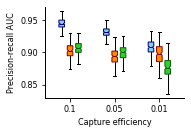

In [22]:
fig = plt.figure(figsize=(6/2.4, 4/2.4))
# gs = GridSpec(1,7)
# gs.update(wspace=0.05, hspace=0.10)
ax = fig.add_subplot(111)
# ax_2 = fig.add_subplot(gs[0,4:7])# option 1, specify props dictionaries

ax.boxplot([psix_1_auc, psix_05_auc, psix_01_auc], positions=[1,5,9], notch=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='navy'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='navy'), showfliers=False
            )

ax.boxplot([kw_1_auc, kw_05_auc, kw_01_auc], positions=[1.75,5.75,9.75], notch=True, patch_artist=True,
            boxprops=dict(facecolor='darkorange', color='darkred'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkred'), showfliers=False
            )

ax.boxplot([gearyc_1_auc, gearyc_05_auc, gearyc_01_auc], positions=[2.5,6.5,10.5], notch=True, patch_artist=True,
            boxprops=dict(facecolor='limegreen', color='darkgreen'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkgreen'), showfliers=False
            )

ax.set_xticks([1.75, 5.75, 9.75])
ax.set_xticklabels(['0.1', '0.05', '0.01'], size=8)
ax.set_xlabel('Capture efficiency', size=8)

ax.set_yticks([0.85, 0.9, 0.95])
ax.set_yticklabels(['0.85', '0.90', '0.95'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlim([-0.5, 12])

plt.savefig('../plots/single_lineage_auc.png', bbox_inches='tight', res=20000, dpi =2000)
# plt.show()

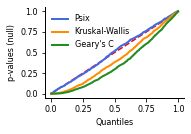

In [23]:
pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(6/2.4, 4/2.4))

ax = fig.add_subplot(111)
ax.plot(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))),
            sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))), c='red',
        linestyle='--')

ax.plot(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))),
            sorted(psix_results_1.loc[neg].pvals), label='Psix', linewidth=2, c='royalblue')

ax.plot(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))),
            sorted(kw_1.loc[neg].pvals), label='Kruskal-Wallis', linewidth=2, c='darkorange')

ax.plot(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))),
            sorted(gearyc_1.loc[neg].pvals), label="Geary's C", linewidth=2, c='forestgreen')


ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'], size=8)
ax.set_xlabel('Quantiles', size=8)

ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'], size=8)
ax.set_ylabel('p-values (null)', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend(frameon=False, fontsize=8)

plt.savefig('../plots/single_lineage_pvals.png', bbox_inches='tight', res=20000, dpi =2000)

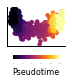

In [25]:
rd = pd.read_csv('processed_tables/pc2_rd.tab.gz', sep='\t', index_col=0)

fig = plt.figure(figsize=(2.5/2.4, 2.5/2.4))
ax = fig.add_subplot(111)

sc = ax.scatter(-rd.PC_1, -rd.PC_2, c=meta.lineage_depth, cmap='inferno', vmin=0, s=20, linewidth=0)
cb = plt.colorbar(sc, shrink = 0.8, aspect=10, orientation="horizontal")
cb.set_label(label='Pseudotime',size=8)
cb.outline.set_visible(False)
cb.ax.tick_params(labelsize=0, length=0)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left = False,
    right = False, # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
labelleft=False)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig('../plots/single_lineage.png', bbox_inches='tight', res=20000, dpi =2000)

In [28]:
underlying_psi = pd.read_csv('sim_output/psi_underlying.tab.gz', sep='\t', 
                               names = ['cell_'+str(i+1) for i in range(1000)])
underlying_psi.index = ['gene' + str(i+1) for i in range(5000)]
underlying_psi = expit(underlying_psi)

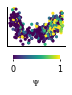

In [30]:
rd = pd.read_csv('processed_tables/pc2_rd.tab.gz', sep='\t', index_col=0)

# pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
# neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(2.5/2.4, 2.5/2.4))
ax = fig.add_subplot(111)

sc = ax.scatter(-rd.PC_1, -rd.PC_2, c=psix_single_lineage_1.adata.uns['psi']['gene316'], vmin=0, vmax=1, s=10, linewidth=0)
cb = plt.colorbar(sc, shrink = 0.8, aspect=10, orientation="horizontal")
cb.set_label(label='$\Psi$',size=8)
cb.outline.set_visible(False)
cb.ax.tick_params(labelsize=8, length=2)


# plt.title('Positives')
# ax.tick_params(labelsize=8, length=1)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left = False,
    right = False, # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
labelleft=False)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig('../plots/positive_pca.png', bbox_inches='tight', res=20000, dpi =2000)

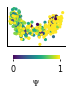

In [31]:
rd = pd.read_csv('processed_tables/pc2_rd.tab.gz', sep='\t', index_col=0)

pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(2.5/2.4, 2.5/2.4))
ax = fig.add_subplot(111)

sc = ax.scatter(-rd.PC_1, -rd.PC_2, c=psix_single_lineage_1.adata.uns['psi']['gene4452'], vmin=0, vmax=1, s=10, linewidth=0)
cb = plt.colorbar(sc, shrink = 0.8, aspect=10, orientation="horizontal")
cb.set_label(label='$\Psi$',size=8)
cb.outline.set_visible(False)
cb.ax.tick_params(labelsize=8, length=2)


# plt.title('Positives')
# ax.tick_params(labelsize=8, length=1)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left = False,
    right = False, # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
labelleft=False)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig('../plots/negative_pca.png', bbox_inches='tight', res=20000, dpi =2000)

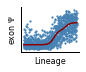

In [32]:
# rd = pd.read_csv('single_lineage/processed_tables/pc2_rd.tab.gz', sep='\t', index_col=0)

# pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
# neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(2.5/2.4, 2/2.4))
ax = fig.add_subplot(111)

ax.scatter(meta.lineage_depth, underlying_psi.loc['gene316'], c='steelblue', s=5, linewidth=0)
ax.plot(meta.sort_values('lineage_depth').lineage_depth, 
        platonic_psi.loc['gene316', meta.sort_values('lineage_depth').index], c='darkred')


ax.set_xlabel('Lineage', size=8)
ax.set_ylabel('exon $\Psi$', size=8)
# ax.tick_params(labelsize=8, length=1)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left = False,
    right = False, # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
labelleft=False)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylim(-0.05, 1.05)

plt.savefig('../plots/positive_psi.png', bbox_inches='tight', res=20000, dpi =2000)

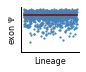

In [33]:
# rd = pd.read_csv('single_lineage/processed_tables/pc2_rd.tab.gz', sep='\t', index_col=0)

# pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
# neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(2.5/2.4, 2/2.4))
ax = fig.add_subplot(111)

ax.scatter(meta.lineage_depth, underlying_psi.loc['gene4452'], c='steelblue', s=5, linewidth=0)
ax.plot(meta.sort_values('lineage_depth').lineage_depth, 
        platonic_psi.loc['gene4452', meta.sort_values('lineage_depth').index], c='darkred')


ax.set_xlabel('Lineage', size=8)
ax.set_ylabel('exon $\Psi$', size=8)
# ax.tick_params(labelsize=8, length=1)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left = False,
    right = False, # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
labelleft=False)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylim(-0.05, 1.05)


plt.savefig('../plots/negative_psi.png', bbox_inches='tight', res=20000, dpi =2000)

In [34]:
gene_expression = pd.read_csv('sim_output/gene_counts.tab.gz', sep='\t', 
                               names = ['cell_'+str(i+1) for i in range(1000)])
gene_expression.index = ['gene' + str(i+1) for i in range(5000)]

# gene_expression = expit(ungene_expression)


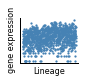

In [35]:

# pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
# neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(2.5/2.4, 2/2.4))
ax = fig.add_subplot(111)

ax.scatter(meta.lineage_depth, np.log1p(gene_expression.loc['gene316']), c='steelblue', s=5, linewidth=0)
# ax.plot(meta.sort_values('lineage_depth').lineage_depth, 
#        gene_expression.loc['gene316', meta.sort_values('lineage_depth').index], c='darkred')


ax.set_xlabel('Lineage', size=8)
ax.set_ylabel('gene expression', size=8)
# ax.tick_params(labelsize=8, length=1)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left = False,
    right = False, # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
labelleft=False)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.set_ylim(-0.05, 1.05)

plt.savefig('../plots/positive_gene.png', bbox_inches='tight', res=20000, dpi =2000)

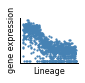

In [36]:

# pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
# neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(2.5/2.4, 2/2.4))
ax = fig.add_subplot(111)

ax.scatter(meta.lineage_depth, np.log1p(gene_expression.loc['gene4452']), c='steelblue', s=5, linewidth=0)
# ax.plot(meta.sort_values('lineage_depth').lineage_depth, 
#        gene_expression.loc['gene316', meta.sort_values('lineage_depth').index], c='darkred')


ax.set_xlabel('Lineage', size=8)
ax.set_ylabel('gene expression', size=8)
# ax.tick_params(labelsize=8, length=1)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left = False,
    right = False, # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
labelleft=False)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.set_ylim(-0.05, 1.05)

plt.savefig('../plots/negative_gene.png', bbox_inches='tight', res=20000, dpi =2000)

In [39]:
import os 

# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=5)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_5.tab.gz', sep='\t', index=True, header=True)

# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=10)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_10.tab.gz', sep='\t', index=True, header=True)


# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=20)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_20.tab.gz', sep='\t', index=True, header=True)


# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=30)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_30.tab.gz', sep='\t', index=True, header=True)

# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=50)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_50.tab.gz', sep='\t', index=True, header=True)

# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=100)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_100.tab.gz', sep='\t', index=True, header=True)

# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=150)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_150.tab.gz', sep='\t', index=True, header=True)

# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=200)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_200.tab.gz', sep='\t', index=True, header=True)

# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=250)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_250.tab.gz', sep='\t', index=True, header=True)

# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=300)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_300.tab.gz', sep='\t', index=True, header=True)

# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=400)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_400.tab.gz', sep='\t', index=True, header=True)

# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=500)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_500.tab.gz', sep='\t', index=True, header=True)


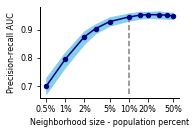

In [49]:
psix_5 = pd.read_csv('k_sensitivity/k_5.tab.gz', sep='\t', index_col=0)
psix_10 = pd.read_csv('k_sensitivity/k_10.tab.gz', sep='\t', index_col=0)
psix_20 = pd.read_csv('k_sensitivity/k_20.tab.gz', sep='\t', index_col=0)
psix_30 = pd.read_csv('k_sensitivity/k_30.tab.gz', sep='\t', index_col=0)
psix_50 = pd.read_csv('k_sensitivity/k_50.tab.gz', sep='\t', index_col=0)
psix_100 = pd.read_csv('k_sensitivity/k_100.tab.gz', sep='\t', index_col=0)
psix_150 = pd.read_csv('k_sensitivity/k_150.tab.gz', sep='\t', index_col=0)
psix_200 = pd.read_csv('k_sensitivity/k_200.tab.gz', sep='\t', index_col=0)
psix_300 = pd.read_csv('k_sensitivity/k_300.tab.gz', sep='\t', index_col=0)
psix_400 = pd.read_csv('k_sensitivity/k_400.tab.gz', sep='\t', index_col=0)
psix_500 = pd.read_csv('k_sensitivity/k_500.tab.gz', sep='\t', index_col=0)

pos = []
neg = []
for i in range(5000):
    if ('gene'+str(i+1)) in psix_5.index:

        if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.2:
            pos.append('gene'+str(i+1))
        else:
        #elif ds[i] == 0:
            neg.append('gene'+str(i+1))

    
labels = [1]*len(pos) + [0]*len(neg)
order = list(pos) + list(neg)

    
y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])

boxplot_list = []
for x in [psix_5, psix_10, psix_20, psix_30, psix_50, psix_100, psix_150, psix_200, psix_300, psix_400, psix_500]:
    
    box = []
    for i in range(200):
        
        pos_sample = np.random.choice(pos, int(len(pos)*0.2), replace=False)
        neg_sample = np.random.choice(neg, int(len(neg)*0.2), replace=False)

        labels = [1]*len(pos_sample) + [0]*len(neg_sample)
        order = list(pos_sample) + list(neg_sample)


        y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])
        
        
        pre, rec, thres = precision_recall_curve(y_, x.loc[order].psix_score)
    
        box.append(auc(rec, pre))

    boxplot_list.append(box)

    

names = pd.Index(['gene' + str(i) for i in range(1, 5001)]) & psix_5.index

pos = []
neg = []
order = []
y = []
for i in range(5000):
    if ('gene'+str(i+1)) in psix_5.index:

        if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.2:
            y.append(1)
            pos.append('gene'+str(i+1))
            order.append('gene'+str(i+1))
        else:
#         elif ds[i] == 0:
            neg.append('gene'+str(i+1))
            y.append(0)
            order.append('gene'+str(i+1))
    
    
recall_list = []
for x in [psix_5, psix_10, psix_20, psix_30, psix_50, psix_100, psix_150, psix_200, psix_300, psix_400, psix_500]:
    pre, rec, thres = precision_recall_curve(y, x.loc[order].psix_score)
    
    recall_list.append(auc(rec, pre))


fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

ax.fill_between(np.log10(np.array([0.5, 1, 2, 3, 5, 10, 15, 20, 30, 40, 50])), [np.quantile(x, 0.05) for x in boxplot_list], 
                 [np.quantile(x, 0.95) for x in boxplot_list], color='skyblue')

ax.plot([1, 1], [np.quantile(boxplot_list[0], 0.05), recall_list[5]], linestyle='--', c='gray')

ax.scatter(np.log10(np.array([0.5, 1, 2, 3, 5, 10, 15, 20, 30, 40, 50])), recall_list, c='navy', zorder=20, s=20)

ax.plot(np.log10(np.array([0.5, 1, 2, 3, 5, 10, 15, 20, 30, 40, 50])), recall_list, c='navy', zorder=20)

ax.set_xticks(np.log10(np.array([0.5, 1, 2, 5, 10, 20, 50])))

ax.set_xticklabels(['0.5%', '1%', '2%', '5%', '10%', '20%', '50%'], size=8)

ax.set_xlabel('Neighborhood size - population percent', size=8)

ax.set_yticks([0.7, 0.8, 0.9])
ax.set_yticklabels(['0.7', '0.8', '0.9'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# ax.set_xlim([-0.5, 12])

plt.savefig('../plots/single_lineage_kauc.png', bbox_inches='tight', res=20000, dpi =2000)


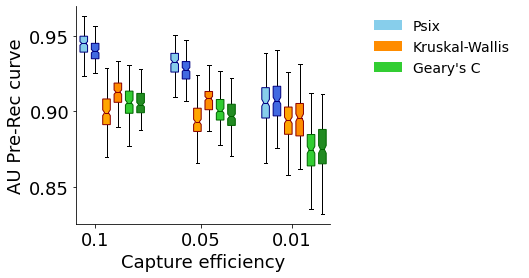

In [25]:
fig = plt.figure(figsize=(8, 4))
gs = GridSpec(1,7)
gs.update(wspace=0.05, hspace=0.10)
ax = fig.add_subplot(gs[0,0:4])
ax_2 = fig.add_subplot(gs[0,4:7])# option 1, specify props dictionaries

ax.boxplot([psix_1_auc, psix_05_auc, psix_01_auc], positions=[1,7,13], notch=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='navy'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='navy'), showfliers=False
            )

ax.boxplot([psix_1_auc_, psix_05_auc_, psix_01_auc_], positions=[1.75,7.75,13.75], notch=True, patch_artist=True,
            boxprops=dict(facecolor='royalblue', color='navy'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='navy'), showfliers=False
            )

ax.boxplot([kw_1_auc, kw_05_auc, kw_01_auc], positions=[2.5,8.5,14.5], notch=True, patch_artist=True,
            boxprops=dict(facecolor='orange', color='darkred'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkred'), showfliers=False
            )

ax.boxplot([kw_1_auc_, kw_05_auc_, kw_01_auc_], positions=[3.25,9.25,15.25], notch=True, patch_artist=True,
            boxprops=dict(facecolor='darkorange', color='darkred'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkred'), showfliers=False
            )

ax.boxplot([gearyc_1_auc, gearyc_05_auc, gearyc_01_auc], positions=[4,10,16], notch=True, patch_artist=True,
            boxprops=dict(facecolor='limegreen', color='darkgreen'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkgreen'), showfliers=False
            )

ax.boxplot([gearyc_1_auc_, gearyc_05_auc_, gearyc_01_auc_], positions=[4.75,10.75,16.75], notch=True, patch_artist=True,
            boxprops=dict(facecolor='forestgreen', color='darkgreen'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkgreen'), showfliers=False
            )

ax.set_xticks([1.75, 8.75, 14.75])
ax.set_xticklabels(['0.1', '0.05', '0.01'], size=18)
ax.set_xlabel('Capture efficiency', size=18)

ax.set_yticks([0.85, 0.9, 0.95])
ax.set_yticklabels(['0.85', '0.90', '0.95'], size=18)
ax.set_ylabel('AU Pre-Rec curve', size=18)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax_2.set_xlim([0, 0])

ax_2.hist([-1, -1], color='skyblue', label='Psix')
ax_2.hist([-1, -1], color='darkorange', label='Kruskal-Wallis')
ax_2.hist([-1, -1], color='limegreen', label="Geary's C")

ax_2.spines["bottom"].set_visible(False)
ax_2.spines["top"].set_visible(False)
ax_2.spines["right"].set_visible(False)
ax_2.spines["left"].set_visible(False)

ax_2.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,  
    right=False,
    left=False, # ticks along the top edge are off
    labelleft=False,
    labelbottom=False)

ax_2.legend(frameon=False, fontsize=14)